# Homework 1

This homework should be submitted as one notebook. When completed, please rename the notebook before sending as follows: *hw1_\<lastname\>_\<firstname\>.ipynb* (example: *hw1_Bond_James.ipynb*).

# Part 1: Differentiation

Since it easy to google every task please please please try to understand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. A good way to derive solutions for these tasks is to derive it for single elements and then generalize to the resulting matrix/vector.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
[3](http://cal.cs.illinois.edu/~johannes/research/matrix%20calculus.pdf)

### Student's comment: 

During NLA course we studied various vectir/matrix differentiation, beside these lectures I want to site Matrix cookbokk containing all nesessary facts: https://www.ics.uci.edu/~welling/teaching/KernelsICS273B/MatrixCookBook.pdf

## ex. 1 *[0.5 points]*

Scalar w.r.t. vector:
$$  
y = c^Tx,  \quad x \in \mathbb{R}^N 
$$

#### Solution:

$$
y = c^Tx = (c, x) = \sum\limits_{i=1}^N c_ix_i \Rightarrow \frac{dy}{dx} = \frac{d\big[\sum\limits_{i=1}^N c_ix_i\big]}{dx}  
$$ 

Now it's better to look at derivative with respect to $x_j$:
$$
\frac{dy}{dx_j} = \frac{d\big[\sum\limits_{i=1}^N c_ix_i\big]}{dx_j} = c_j \Rightarrow \frac{dy}{dx} = с
$$

## ex. 2 *[0.5 points]*

Vector w.r.t. vector:
$$ y = \sum_{j=1}^{N} cx^T \quad c \in \mathbb{R}^{M} ,x \in \mathbb{R}^{N}, cx^T \in \mathbb{R}^{M \times N} $$ 

#### Solution:

Here we will find $i$ component of derivative again with respect to some $x_j$: 
$$
\frac{dy_i}{dx_j} = \frac{d\big[\sum\limits_{j=1}^N  cx^T\big]_i}{dx_j} = c_j \Rightarrow \frac{dy_i}{dx} = с \Rightarrow \frac{dy}{dx} = (\underbrace{c, \ldots, c}_{N})^T
$$



## ex. 3 *[1 points]*

Vector w.r.t. vector:
$$  
y = x x^T x , x \in \mathbb{R}^{N}
$$

#### Solution:
Here we will use product rule of differentiation, where $I$ - identity matrix:
$$
\frac{d[x x^T x]}{dx} = x\frac{d[x^T x]}{dx} + \frac{dx}{dx}x^T x = x \cdot 2x^T + I x^T x = 2x x^T + I x^T x
$$

Note: 
$$
\frac{d[x^T x]}{dx_i} = \frac{d\big[\sum\limits_{j=1}^Nx_jx_j\big]}{dx_i} = 2x_i \Rightarrow \frac{d[x^T x]}{dx} = 2x^T
$$

## ex. 4 *[1 points]*

Derivatives for the parameters of the Dense layer:

***Given :***  $$Y = XW, Y \in \mathbb{R}^{N \times OUT}, X \in \mathbb{R}^{N \times IN}, W \in \mathbb{R}^{IN \times OUT} $$ 

The derivative of the hypothetic loss function w.r.t. to $Y$ is known: $\Delta Y  \in \mathbb{R}^{N \times OUT}$

***Task :*** Please, derive the gradients of the loss w.r.t the weight matrix $W$: $\Delta W  \in \mathbb{R}^{IN \times OUT}$. Use the chain rule. First, please, derive each element of the $\Delta W$, then generalize to the matrix form.
 
Useful link: http://cs231n.stanford.edu/vecDerivs.pdf


#### Solution:
Let's denote our loss function as $F$. Then straightforward from "useful link" (and also common sence):
$$
Y_{ij} = \sum\limits_{k=1}^{IN} X_{ik}W_{kj} \Rightarrow
\frac{\partial Y_{ij}}{\partial W_{mn}} = \sum\limits_{k=1} X_{ik}\frac{\partial W_{kj}}{\partial W_{mn}} = X_{im}
$$

We get this answer only for components with $j = n$, otherwise it will be 0 becaise of derivation. Thus for our loss function with chain rule we will have:

$$
\frac{\partial F}{\partial W_{mn}} = \frac{\partial F}{\partial Y_{ij}} \frac{\partial Y_{ij}}{\partial W_{mn}}  = \sum\limits_i \frac{\partial F}{\partial Y_{in}} X_{im} \text{ - we got component of vector of interest } \Rightarrow \Delta W = X^T \cdot \Delta Y  
$$

# Part 2: Modules

In this part you need to implement the modules of your neural network in NumPy.

In [12]:
import numpy as np

**Module** is an abstract class which defines fundamental methods necessary for a training a neural network. You do not need to change anything here, just read the comments.

In [11]:
class Module(object):
    """
    Basically, you can think of a module as of a something (black box) 
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`: 
        
        output = module.forward(input)
    
    The module should be able to perform a backward pass: to differentiate the `forward` function. 
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule. 
    
        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self):
        self.output = None
        self.gradInput = None
        self.training = True
    
    def forward(self, input):
        """
        Takes an input object, and computes the corresponding output of the module.
        """
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        """
        Performs a backpropagation step through the module, with respect to the given input.
        
        This includes 
         - computing a gradient w.r.t. `input` (is needed for further backprop),
         - computing a gradient w.r.t. parameters (to update parameters while optimizing).
        """
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput
    

    def updateOutput(self, input):
        """
        Computes the output using the current parameter set of the class and input.
        This function returns the result which is stored in the `output` field.
        
        Make sure to both store the data in `output` field and return it. 
        """
        
        # The easiest case:
            
        # self.output = input 
        # return self.output
        
        pass

    def updateGradInput(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own input. 
        This is returned in `gradInput`. Also, the `gradInput` state variable is updated accordingly.
        
        The shape of `gradInput` is always the same as the shape of `input`.
        
        Make sure to both store the gradients in `gradInput` field and return it.
        """
        
        # The easiest case:
        
        # self.gradInput = gradOutput 
        # return self.gradInput
        
        pass   
    
    def accGradParameters(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own parameters.
        No need to override if module has no parameters (e.g. ReLU).
        """
        pass
    
    def zeroGradParameters(self): 
        """
        Zeroes `gradParams` variable if the module has params.
        """
        pass
        
    def getParameters(self):
        """
        Returns a list with its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
        
    def getGradParameters(self):
        """
        Returns a list with gradients with respect to its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
    
    def train(self):
        """
        Sets training mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = True
    
    def evaluate(self):
        """
        Sets evaluation mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = False
    
    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Module"

# Sequential container *[0.5 pts]*

**Define** a forward and backward pass procedures.

In [10]:
class Sequential(Module):
    """
         This class implements a container, which processes `input` data sequentially. 
         
         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`. 
    """
    
    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []
   
    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:
        
            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})   
            
            
        Just write a little loop. 
        """

        # Your code goes here. ################################################
        output = input
        for m in self.modules:
            output = m.forward(output)
        self.output = output
        
        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:
            
            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)   
            gradInput = module[0].backward(input, g_1)   
             
             
        !!!
                
        To ech module you need to provide the input, module saw while forward pass, 
        it is used while computing gradients. 
        Make sure that the input for `i-th` layer the output of `module[i]` (just the same input as in forward pass) 
        and NOT `input` to this Sequential module. 
        
        !!!
        
        """
        output = gradOutput 
        for i in range(len(self.modules)-1, 0, -1): # as in seminar 1
            output = self.modules[i].backward(self.modules[i-1].output, output)
        self.gradInput = self.modules[0].backward(input, output)
        
        return self.gradInput
      

    def zeroGradParameters(self): 
        for module in self.modules:
            module.zeroGradParameters()
    
    def getParameters(self):
        """
        Should gather all parameters in a list.
        """
        return [x.getParameters() for x in self.modules]
    
    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
        return [x.getGradParameters() for x in self.modules]
    
    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string
    
    def __getitem__(self,x):
        return self.modules.__getitem__(x)
    
    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()
    
    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()

NameError: name 'Module' is not defined

# Layers

You need to implement everything in this part and make sure the code passes all tests. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note

* It is **strongly suggested to use vectorized operations on numpy arrays!** Avoid `for` loops whenever possible. It's very inefficient and might make your networks in Parts 3 and 4 training forever.

* Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling. (e.g., `np.add(b,c,out = a)` instead of `a = b + c`)

## 1. Linear transform layer  *[0.5 pts]*
Also known as dense layer, fully-connected layer, FC-layer, InnerProductLayer (in caffe), affine transform
- input:   **`batch_size x n_feats1`**
- output: **`batch_size x n_feats2`**

In [112]:
# as in seminar 1
class Linear(Module):
    """
    A module which applies a linear transformation 
    A common name is fully-connected layer, InnerProductLayer in caffe. 
    
    The module should work with 2D input of shape (n_samples, n_feature).
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()
       
        # This is a nice initialization
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        # self.output = ...
        self.output = np.dot(input, self.W.T) + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        self.gradInput = np.dot(gradOutput, self.W)
        
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        # self.gradW = ...
        # self.gradb = ...
        self.gradW = np.dot(gradOutput.T, input)
        self.gradb = gradOutput.sum(axis=0)
        
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' %(s[1],s[0])
        return q

## 2. SoftMax *[0.5 pts]*
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{softmax}(x)_i = \frac{\exp x_i} {\sum_j \exp x_j}$

Recall that $\text{softmax}(x) == \text{softmax}(x - \text{const})$. It makes possible to avoid computing exp() from large argument.

In [113]:
class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()
    
    def updateOutput(self, input):
        # start with normalization for numerical stability
        # self.output = ...
        exp = np.exp(np.subtract(input, np.max(input, axis = 1, keepdims = True))) # was discussed in NLA course
        self.output = np.divide(exp, np.sum(exp, axis = 1,  keepdims = True))
        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        subtraction = np.sum(np.multiply(self.output, gradOutput), axis=1, keepdims=True)
        self.gradInput = np.multiply(self.output, np.subtract(gradOutput, subtraction))
        return self.gradInput
    
    def __repr__(self):
        return "SoftMax"

## 3. LogSoftMax *[0.5 pts]*
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{logsoftmax}(x)_i = \log\text{softmax}(x)_i = x_i - \log {\sum_j \exp x_j}$

The main goal of this layer is to be used in computation of log-likelihood loss.

In [114]:
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()
    
    def updateOutput(self, input):
        # start with normalization for numerical stability
        # self.output = ...
        exp = np.exp(np.subtract(input, np.max(input, axis=1, keepdims=True)))
        self.output = np.subtract(np.subtract(input, np.max(input, axis=1, keepdims=True)), np.log(np.sum(exp, axis=1, keepdims=True)))
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        #self.gradInput = np.multiply(np.substract(gradOutput, np.sum(np.multiply(self.output, gradOutput), axis=1)) ,self.output)
        exp = np.exp(np.subtract(input, np.max(input, axis=1, keepdims=True)))
        self.gradInput = np.subtract(gradOutput, np.multiply(np.divide(exp, np.sum(exp, axis=1, keepdims=True)), np.sum(gradOutput, axis=1, keepdims=True)))
        
        return self.gradInput
    
    def __repr__(self):
        return "LogSoftMax"
    
# https://math.stackexchange.com/questions/2013050/log-of-softmax-function-derivative

## 4. Batch normalization *[1 pts]*
One of the most significant recent ideas that impacted NNs a lot is [**Batch normalization**](http://arxiv.org/abs/1502.03167). The idea is simple, yet effective: the features should be whitened ($mean = 0$, $std = 1$) all the way through NN. This improves the convergence for deep models letting it train them for days but not weeks. **You are** to implement the first part of the layer: features normalization. The second part (`ChannelwiseScaling` layer) is implemented below.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

The layer should work as follows. While training (`self.training == True`) it transforms input as $$y = \frac{x - \mu}  {\sqrt{\sigma + \epsilon}}$$
where $\mu$ and $\sigma$ - mean and variance of feature values in **batch** and $\epsilon$ is just a small number for numericall stability. Also during training, layer should maintain exponential moving average values for mean and variance: 
```
    self.moving_mean = self.moving_mean * alpha + batch_mean * (1 - alpha)
    self.moving_variance = self.moving_variance * alpha + batch_variance * (1 - alpha)
```
During testing (`self.training == False`) the layer normalizes input using moving_mean and moving_variance. 

Note that decomposition of batch normalization on normalization itself and channelwise scaling here is just a common **implementation** choice. In general "batch normalization" always assumes normalization + scaling.

**Hint:** to implement the gradients, you can derive yourself or refer to the original paper; [this guide](https://kevinzakka.github.io/2016/09/14/batch_normalization/) might also be useful.

We will compute gradients as in paper: $\frac{\partial f}{\partial x_i} = \frac{(\sigma^2 + \epsilon)^{-0.5}}{n} \bigg[{n \frac{\partial f}{\partial \hat{x}_i}} - {\sum\limits_{j=1}^n  \frac{\partial f}{\partial \hat{x}_j}} - {\hat{x}_i \sum\limits_{j=1}^n \frac{\partial f}{\partial \hat{x}_j} \cdot \hat{x}_j}\bigg ]$

In [115]:
class BatchNormalization(Module):
    EPS = 1e-3
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_mean = None 
        self.moving_variance = None
        
    def updateOutput(self, input):         
        if self.training:
            batch_mean = np.mean(input, axis=0, keepdims=True)
            centered_input = input - batch_mean
            batch_variance = np.var(input, axis=0, keepdims=True)
            
            if self.moving_mean is None:
                self.moving_mean = batch_mean
            else:
                self.moving_mean = self.moving_mean * self.alpha + batch_mean * (1 - self.alpha)
            
            if self.moving_variance is None:
                self.moving_variance = batch_variance
            else:
                self.moving_variance = self.moving_variance * self.alpha + batch_variance * (1 - self.alpha)
            
            self.output = centered_input / np.sqrt(batch_variance + self.EPS)
        else:
            if self.moving_mean is None:
                self.output = input
            else:
                self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)
            
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        
        mean = np.mean(input, axis=0, keepdims=True)
        var = np.var(input, axis=0, keepdims=True)
        x_hat = np.divide(np.subtract(input, mean),(np.sqrt(np.add(var, self.EPS))))
        multiplier = np.divide(1,np.sqrt(np.add(var, self.EPS)))/input.shape[0]
        
        term_1 = np.multiply(gradOutput, input.shape[0])
        term_2 = np.sum(gradOutput, axis = 0)
        term_3 = np.multiply(x_hat, np.sum(np.multiply(gradOutput, x_hat), axis = 0))
        
        S = np.subtract(term_1, np.add(term_2, term_3))
        self.gradInput = np.multiply(multiplier, S)
        return self.gradInput
    
    def __repr__(self):
        return "BatchNormalization"

In [116]:
class ChannelwiseScaling(Module):
    """
       Implements linear transform of input y = \gamma * x + \beta
       where \gamma, \beta - learnable vectors of length x.shape[-1]
    """
    def __init__(self, n_out):
        super(ChannelwiseScaling, self).__init__()

        stdv = 1./np.sqrt(n_out)
        self.gamma = np.random.uniform(-stdv, stdv, size=n_out)
        self.beta = np.random.uniform(-stdv, stdv, size=n_out)
        
        self.gradGamma = np.zeros_like(self.gamma)
        self.gradBeta = np.zeros_like(self.beta)

    def updateOutput(self, input):
        self.output = input * self.gamma + self.beta
        return self.output
        
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.gamma
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        self.gradBeta = np.sum(gradOutput, axis=0)
        self.gradGamma = np.sum(gradOutput*input, axis=0)
    
    def zeroGradParameters(self):
        self.gradGamma.fill(0)
        self.gradBeta.fill(0)
        
    def getParameters(self):
        return [self.gamma, self.beta]
    
    def getGradParameters(self):
        return [self.gradGamma, self.gradBeta]
    
    def __repr__(self):
        return "ChannelwiseScaling"

Practical notes. If BatchNormalization is placed after a linear transformation layer (including dense layer, convolutions, channelwise scaling) that implements function like `y = weight * x + bias`, than bias adding become useless and could be omitted since its effect will be discarded while batch mean subtraction. If BatchNormalization (followed by `ChannelwiseScaling`) is placed before a layer that propagates scale (including ReLU, LeakyReLU) followed by any linear transformation layer than parameter `gamma` in `ChannelwiseScaling` could be freezed since it could be absorbed into the linear transformation layer.

## 5. Dropout *[0.5 pts]*
Implement [**dropout**](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). The idea and implementation is really simple: just multiply the input by $Bernoulli(p)$ mask. Here $p$ is probability of an element to be zeroed.

This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons.

While training (`self.training == True`) it should sample a mask on each iteration (for every batch), zero out elements and multiply elements by $1 / (1 - p)$. The latter is needed for keeping mean values of features close to mean values which will be in test mode. When testing this module should implement identity transform i.e. `self.output = input`.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

In [117]:
class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()
        
        self.p = p
        self.mask = None
        
    def updateOutput(self, input):
        
        self.output = np.zeros_like(input)
        
        if self.training == True:
            self.mask = np.random.binomial(1, 1 - self.p, input.shape)
            self.output = np.divide(np.multiply(input, self.mask), 1 - self.p)
            
        else:
            self.output = input
            
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        
        self.gradInput = np.zeros_like(input)
        
        if self.training == True:
            self.gradInput = np.divide(np.multiply(gradOutput, self.mask), 1 - self.p)
            
        else:
            self.gradInput = gradOutput
            
        return self.gradInput
        
    def __repr__(self):
        return "Dropout"

# Activation functions

Here's the complete example for the **Rectified Linear Unit** non-linearity (aka **ReLU**): 

In [118]:
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    
    def updateOutput(self, input):
        self.output = np.maximum(0, input)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # gradOutput * (input > 0)
        self.gradInput = np.multiply(gradOutput , input > 0)
        return self.gradInput
    
    def __repr__(self):
        return "ReLU"

## 6. Leaky ReLU *[0.5 pts]*
Implement [**Leaky Rectified Linear Unit**](http://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29%23Leaky_ReLUs). Expriment with slope. 

In [119]:
class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()
            
        self.slope = slope
        
    def updateOutput(self, input):
        self.output = np.maximum(input * self.slope, input)
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        #for some reason this approach does not give 'ok', but compile...
        #self.gradInput = np.ones_like(input) 
        #self.gradInput[input < 0] = self.slope
        self.gradInput = np.multiply(gradOutput, np.where(input < 0, self.slope, 1))
        
        return self.gradInput
    
    def __repr__(self):
        return "LeakyReLU"

## 7. ELU *[0.5 pts]*
Implement [**Exponential Linear Units**](http://arxiv.org/abs/1511.07289) activations.

In [120]:
class ELU(Module):
    def __init__(self, alpha = 1.0):
        super(ELU, self).__init__()
        
        self.alpha = alpha
        
    def updateOutput(self, input):
        
        #positive = np.multiply(input, input > 0)
        #negative = np.multiply(np.multiply(self.alpha, np.exp(input) - 1), (input > 0))
        #self.output = positive + negative  
        # again problem here, I definetely missing smth
        self.output = np.where(input < 0, np.multiply(np.exp(input) - 1, self.alpha), input)
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        # no problem here though!
        positive = np.multiply(gradOutput, input > 0)
        negative = np.multiply(np.multiply(self.alpha, np.multiply(gradOutput, input <= 0)), np.exp(input) + self.alpha - 1)
        self.gradInput = positive + negative    
        
        return self.gradInput
    
    def __repr__(self):
        return "ELU"

## 8. SoftPlus *[0.5 pts]*
Implement [**SoftPlus**](https://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29) activations. Look, how they look a lot like ReLU.

In [121]:
import scipy.special

class SoftPlus(Module):
    def __init__(self):
        super(SoftPlus, self).__init__()
    
    def updateOutput(self, input):
        self.output = np.log(np.exp(input) + 1)
        
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput, np.exp(input) / (np.exp(input) + 1))
        return self.gradInput
    
    def __repr__(self):
        return "SoftPlus"

# Criterions

Criterions are used to score the models answers. 

In [122]:
class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None
        
    def forward(self, input, target):
        """
            Given an input and a target, compute the loss function 
            associated to the criterion and return the result.
            
            For consistency this function should not be overrided,
            all the code goes in `updateOutput`.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
            Given an input and a target, compute the gradients of the loss function
            associated to the criterion and return the result. 

            For consistency this function should not be overrided,
            all the code goes in `updateGradInput`.
        """
        return self.updateGradInput(input, target)
    
    def updateOutput(self, input, target):
        """
        Function to override.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Function to override.
        """
        return self.gradInput   

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Criterion"

The **MSECriterion**, which is basic L2 norm usually used for regression, is implemented here for you.
- input:   **`batch_size x n_feats`**
- target: **`batch_size x n_feats`**
- output: **scalar**

In [123]:
class MSECriterion(Criterion):
    def __init__(self):
        super(MSECriterion, self).__init__()
        
    def updateOutput(self, input, target):   
        self.output = np.sum(np.power(input - target,2)) / input.shape[0]
        return self.output 
 
    def updateGradInput(self, input, target):
        self.gradInput  = (input - target) * 2 / input.shape[0]
        return self.gradInput

    def __repr__(self):
        return "MSECriterion"

## 9. Negative LogLikelihood criterion (numerically unstable) *[0.5 pts]*
You task is to implement the **ClassNLLCriterion**. It should implement [multiclass log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss). Nevertheless there is a sum over `y` (target) in that formula, 
remember that targets are one-hot encoded. This fact simplifies the computations a lot. Note, that criterions are the only places, where you divide by batch size. Also there is a small hack with adding small number to probabilities to avoid computing log(0).
- input:   **`batch_size x n_feats`** - probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**



In [124]:
class ClassNLLCriterionUnstable(Criterion):
    EPS = 1e-15
    def __init__(self):
        a = super(ClassNLLCriterionUnstable, self)
        super(ClassNLLCriterionUnstable, self).__init__()
    def updateOutput(self, input, target): 
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
        
        self.output = -np.divide(np.sum(np.multiply(target, np.log(input_clamp))), input.shape[0])
        return self.output

    def updateGradInput(self, input, target):
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
                
        self.gradInput = -np.divide(np.divide(target, input_clamp), input.shape[0])
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterionUnstable"

## 10. Negative LogLikelihood criterion (numerically stable) *[0.5 pts]*
- input:   **`batch_size x n_feats`** - log probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**

Task is similar to the previous one, but now the criterion input is the output of log-softmax layer. This decomposition allows us to avoid problems with computation of forward and backward of log().

In [125]:
class ClassNLLCriterion(Criterion):
    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()
        
    def updateOutput(self, input, target): 
        self.output = - 1 / input.shape[0] * np.sum(np.multiply(target, input))
        return self.output

    def updateGradInput(self, input, target):
        self.gradInput = -  1 / input.shape[0] * target 
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterion"

# Optimizers

### SGD optimizer with momentum
- `variables` - list of lists of variables (one list per layer)
- `gradients` - list of lists of current gradients (same structure as for `variables`, one array for each var)
- `config` - dict with optimization parameters (`learning_rate` and `momentum`)
- `state` - dict with optimizator state (used to save accumulated gradients)

In [126]:
def sgd_momentum(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('accumulated_grads', {})
    
    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            
            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))
            
            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)
            
            current_var -= old_grad
            var_index += 1     

## 12. [Adam](https://arxiv.org/pdf/1412.6980.pdf) optimizer *[0.5 pts]*
- `variables` - list of lists of variables (one list per layer)
- `gradients` - list of lists of current gradients (same structure as for `variables`, one array for each var)
- `config` - dict with optimization parameters (`learning_rate`, `beta1`, `beta2`, `epsilon`)
- `state` - dict with optimizator state (used to save 1st and 2nd moment for vars)

Formulas for optimizer:

Current step learning rate: $$\text{lr}_t = \text{learning_rate} * \frac{\sqrt{1-\beta_2^t}} {1-\beta_1^t}$$
First moment of var: $$\mu_t = \beta_1 * \mu_{t-1} + (1 - \beta_1)*g$$ 
Second moment of var: $$v_t = \beta_2 * v_{t-1} + (1 - \beta_2)*g*g$$
New values of var: $$\text{variable} = \text{variable} - \text{lr}_t * \frac{m_t}{\sqrt{v_t} + \epsilon}$$

In [127]:
def adam_optimizer(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('m', {})  # first moment vars
    state.setdefault('v', {})  # second moment vars
    state.setdefault('t', 0)   # timestamp
    state['t'] += 1
    for k in ['learning_rate', 'beta1', 'beta2', 'epsilon']:
        assert k in config, config.keys()
    
    var_index = 0 
    lr_t = config['learning_rate'] * np.sqrt(1 - config['beta2']**state['t']) / (1 - config['beta1']**state['t'])
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            var_first_moment = state['m'].setdefault(var_index, np.zeros_like(current_grad))
            var_second_moment = state['v'].setdefault(var_index, np.zeros_like(current_grad))
            
            # <YOUR CODE> #######################################
            # update `current_var_first_moment`, `var_second_moment` and `current_var` values
            g = current_grad
            np.add(np.multiply(config['beta1'], var_first_moment), np.multiply((1 - config['beta1']), g), out = var_first_moment)
            np.add(np.multiply(config['beta2'], var_second_moment), np.multiply(np.multiply((1 - config['beta2']), g), g), out = var_second_moment)
            update_var = np.multiply(lr_t, np.divide(var_first_moment, np.add(np.sqrt(var_second_moment), config['epsilon'])))
            np.subtract(current_var, update_var, out = current_var)
            # #####################################
            
            # small checks that you've updated the state; use np.add for rewriting np.arrays values
            assert var_first_moment is state['m'].get(var_index)
            assert var_second_moment is state['v'].get(var_index)
            var_index += 1


## Testing the modules

Please run the following code provided for you to check the correctness of the implementations. It is strongly advised to run this code frequently while completing the homework.

You don't need to modify the cells in this section.

In [22]:
from test_modules import make_tester
import unittest

In [23]:
TestLayers = make_tester({
    'Sequential': Sequential,
    'Linear': Linear,
    'SoftMax': SoftMax,
    'LogSoftMax': LogSoftMax,
    'BatchNormalization': BatchNormalization,
    'ChannelwiseScaling': ChannelwiseScaling,
    'Dropout': Dropout,
    'ReLU': ReLU,
    'LeakyReLU': LeakyReLU,
    'ELU': ELU,
    'SoftPlus': SoftPlus,
    'ClassNLLCriterion': ClassNLLCriterion,
    'ClassNLLCriterionUnstable': ClassNLLCriterionUnstable,
    'adam_optimizer': adam_optimizer,
})

In [24]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLayers)

In [25]:
unittest.TextTestRunner(verbosity=2).run(suite)

test_BatchNormalization (test_modules.make_tester.<locals>._tester) ... ok
test_ClassNLLCriterion (test_modules.make_tester.<locals>._tester) ... ERROR
test_ClassNLLCriterionUnstable (test_modules.make_tester.<locals>._tester) ... ERROR
test_Dropout (test_modules.make_tester.<locals>._tester) ... ok
test_ELU (test_modules.make_tester.<locals>._tester) ... ok
test_LeakyReLU (test_modules.make_tester.<locals>._tester) ... ok
test_Linear (test_modules.make_tester.<locals>._tester) ... ok
test_LogSoftMax (test_modules.make_tester.<locals>._tester) ... ok
test_Sequential_BatchNorm_ChannelwiseScaling (test_modules.make_tester.<locals>._tester) ... ok
test_Sequential_Linear_LeakyReLU (test_modules.make_tester.<locals>._tester) ... ok
test_SoftMax (test_modules.make_tester.<locals>._tester) ... ok
test_SoftPlus (test_modules.make_tester.<locals>._tester) ... ok
test_adam_optimizer (test_modules.make_tester.<locals>._tester) ... ok

ERROR: test_ClassNLLCriterion (test_modules.make_tester.<local

<unittest.runner.TextTestResult run=13 errors=2 failures=0>

This error concerns me a lot. I do not understand the reason - it is some problem not with my code (criterion works as intended), but woth torch. By the way, on collab everything is alright - I attach screenshot. But collab had other issues itself - You can see the history of my problems in submission history...

![title](tests.png)

# Part 3: Training your first network

In [26]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

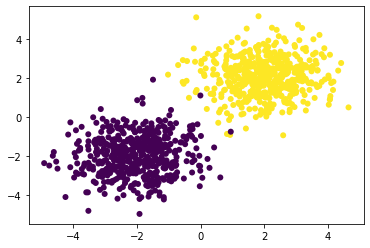

In [27]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0], X[:,1], c=Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [28]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like this then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())

print(net) # looks ok

Linear 2 -> 2
LogSoftMax

Linear 2 -> 4
ReLU
Linear 4 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [29]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [30]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

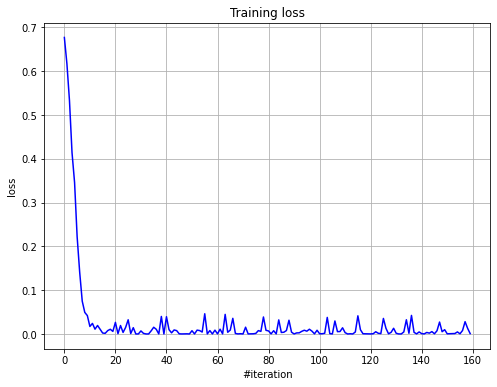

Current loss: 0.000867


In [31]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    plt.grid('on')    
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We will be using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [32]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [33]:
from sklearn.preprocessing import OneHotEncoder

ohot_encoder = OneHotEncoder(categories=[range(10)])

y_train_hot = np.asarray(ohot_encoder.fit_transform(y_train.reshape(-1, 1)).todense())
y_val_hot = np.asarray(ohot_encoder.transform(y_val.reshape(-1, 1)).todense())
y_test_hot = np.asarray(ohot_encoder.transform(y_test.reshape(-1, 1)).todense())

In [34]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

-  *[2 pts]* **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
Use an architecture of your choice for the comparison (no need to pick the best optimizer parameters for now). Write your personal opinion on the activation functions, think about computation times too. Plot the loss curves from activation functions comparison on a single plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be informative.

In [35]:
from time import time
from tqdm.notebook import tqdm

def f_net(activation, hidden = 200, out = 10):
    net = Sequential()
    input = 28*28
    net.add(Linear(input, hidden))
    net.add(activation)
    net.add(Linear(hidden,out))
    net.add(LogSoftMax()) 
    return net 

def accuracy(logits, y_true):
    y_pred = np.argmax(logits)
    accuracy = (y_pred == y_true).mean()
    return accuracy

In [36]:
criterion = ClassNLLCriterion() # criterion
#criterion = MSECriterion()
N = 30 # number of epochs
batch_size = 200 # batch
optimizer_config = {'learning_rate' : 1e-1, 
                    'momentum': 0.9}
optimizer_state = {}
activation_list = [ReLU(), ELU(), LeakyReLU(), SoftPlus()]
title_list = ['ReLu', 'ELU', 'LeakyReLU', 'SoftPlus']

time_ = {}

train_loss = {}
test_loss_old = {}
val_loss_old = {}

#acc_loss = {}
#val_acc_old = {}
#test_acc_old = {}

In [37]:
for activation, title in zip(activation_list, title_list):
    net = f_net(activation)
    time_net = 0
    start = 0
    
    loss_history = []
    test_loss_history_old = []
    val_loss_history_old = []

    #acc_history = []
    #val_acc_history_old = []
    #test_acc_history_old = []

    optimizer_state = {}
    print(title + ' training...')
    
    for epoch in tqdm(range(N)):
        for x_batch, y_batch in get_batches((X_train, y_train_hot), batch_size):
        ######################
            net.zeroGradParameters()
            start = time()
            pred = net.forward(x_batch)
            loss = criterion.forward(pred, y_batch)
            dp = criterion.backward(pred, y_batch)
            net.backward(x_batch, dp)
        
            sgd_momentum(net.getParameters(), 
                        net.getGradParameters(), 
                        optimizer_config,
                        optimizer_state)      
        
            loss_history.append(loss)
            #acc_history.append(accuracy(pred, y_batch))
            time_net += time() - start

        if title == 'ReLu':
            pred_val_old = net.forward(X_val)
            val_loss_history_old.append(criterion.forward(pred_val_old, y_val_hot))

            pred_test_old = net.forward(X_test)
            test_loss_history_old.append(criterion.forward(pred_test_old, y_test_hot))

            #val_acc_history_old.append(accuracy(pred_val_old, y_val_hot))

            #test_acc_history_old.append(accuracy(pred_test_old , y_test_hot))
        ######################
        #train_loss_history.append(loss_history)
        '''
            pred_val = net.forward(X_val)
            val_loss_history.append(criterion.forward(pred_val, y_val_hot))
        '''
    time_[title] = time_net
    train_loss[title] = loss_history
    val_loss_old[title] = val_loss_history_old
    test_loss_old[title] = test_loss_history_old
    #acc_loss[title] = acc_history
    #val_acc_old[title] = val_acc_history_old
    #test_acc_old[title] = test_acc_history_old

ReLu training...



ELU training...



LeakyReLU training...



SoftPlus training...


In [38]:
train_loss_old = train_loss
#acc_loss_old = acc_loss
time_old = time_

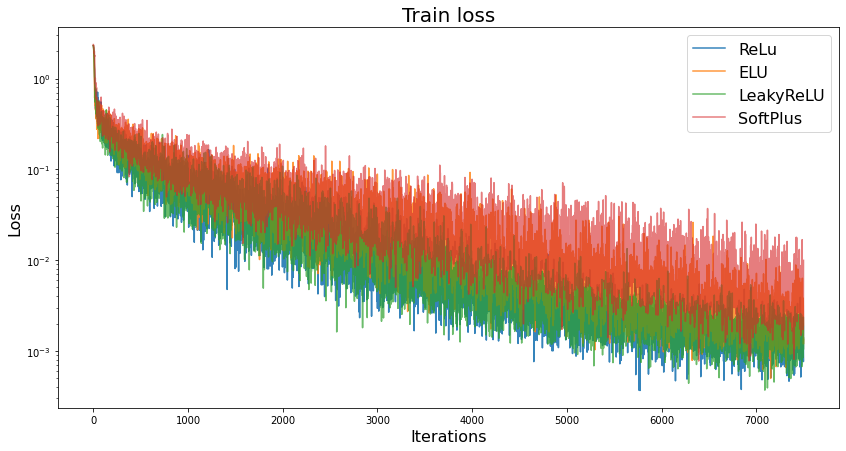

Time for training with ReLu activation function: 66.29362845420837
Time for training with ELU activation function: 69.02833032608032
Time for training with LeakyReLU activation function: 70.88073587417603
Time for training with SoftPlus activation function: 63.36786723136902


In [39]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

i = 1
for title in title_list:
    i -= 0.1
    plt.semilogy(train_loss[title], label = title, alpha = i)

plt.title("Train loss", fontsize = 20)
plt.xlabel("Iterations", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend(loc = 'best', fontsize = 16)
#plt.yscale('log')

plt.show()

for title in title_list:    
    print('Time for training with ' + title + ' activation function: ' + str(time_[title]))

Activation functions' performance is similar, but ReLU and LeakyReLU (they are naturally close to each other) achieve better loss. In terms of speed for 30 epochs these 2 functions again showed better perfomance. The structure of ReLU is most simple (I mean that ReLU does not acquire to involve any computationally intensive operations) among all of described activation functions, so in this task perhaps it helps ReLU to get slightly better results (works faster, works slightly better).

- *[1 pts]* **Try** inserting `BatchNormalization` (followed by `ChannelwiseScaling`) between `Linear` module and activation functions. For all activation functions, plot versions with and without `BatchNormalization` on a single plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.  Does `BatchNormalization` help?


In [40]:
def f_net_batch(activation, hidden = 100, out = 10):
    net = Sequential()
    input = 28*28
    net.add(Linear(input, hidden))
    net.add(BatchNormalization())
    net.add(ChannelwiseScaling(hidden))
    net.add(activation)
    net.add(Linear(hidden,out))
    net.add(BatchNormalization())
    net.add(ChannelwiseScaling(out))
    net.add(LogSoftMax())
    return net 

In [41]:
criterion = ClassNLLCriterion() # criterion
N = 30 # number of epochs
batch_size = 200 # batch
optimizer_config = {'learning_rate' : 1e-1, 
                    'momentum': 0.9}
optimizer_state = {}
activation_list = [ReLU(), ELU(), LeakyReLU(), SoftPlus()]
title_list_batch = ['ReLu with BatchNormalization', 'ELU with BatchNormalization', 'LeakyReLU with BatchNormalization', 'SoftPlus with BatchNormalization']

time_ = {}

train_loss = {}
test_loss = {}
val_loss = {}

In [42]:
for activation, title in zip(activation_list, title_list_batch):
    net = f_net_batch(activation)
    
    time_net = 0
    start = 0
    
    loss_history = []
    optimizer_state = {}
    print(title + ' training...')
    
    for epoch in tqdm(range(N)):
        for x_batch, y_batch in get_batches((X_train, y_train_hot), batch_size):
        ######################
            net.zeroGradParameters()
            start = time()
            pred = net.forward(x_batch)
            loss = criterion.forward(pred, y_batch)
            dp = criterion.backward(pred, y_batch)
            net.backward(x_batch, dp)
        
            sgd_momentum(net.getParameters(), 
                        net.getGradParameters(), 
                        optimizer_config,
                        optimizer_state)      
        
            loss_history.append(loss)
            time_net += time() - start
        ######################
        #train_loss_history.append(loss_history)
        '''
            pred_val = net.forward(X_val)
            val_loss_history.append(criterion.forward(pred_val, y_val_hot))
        '''
    time_[title] = time_net
    train_loss[title] = loss_history

ReLu with BatchNormalization training...



ELU with BatchNormalization training...



LeakyReLU with BatchNormalization training...



SoftPlus with BatchNormalization training...


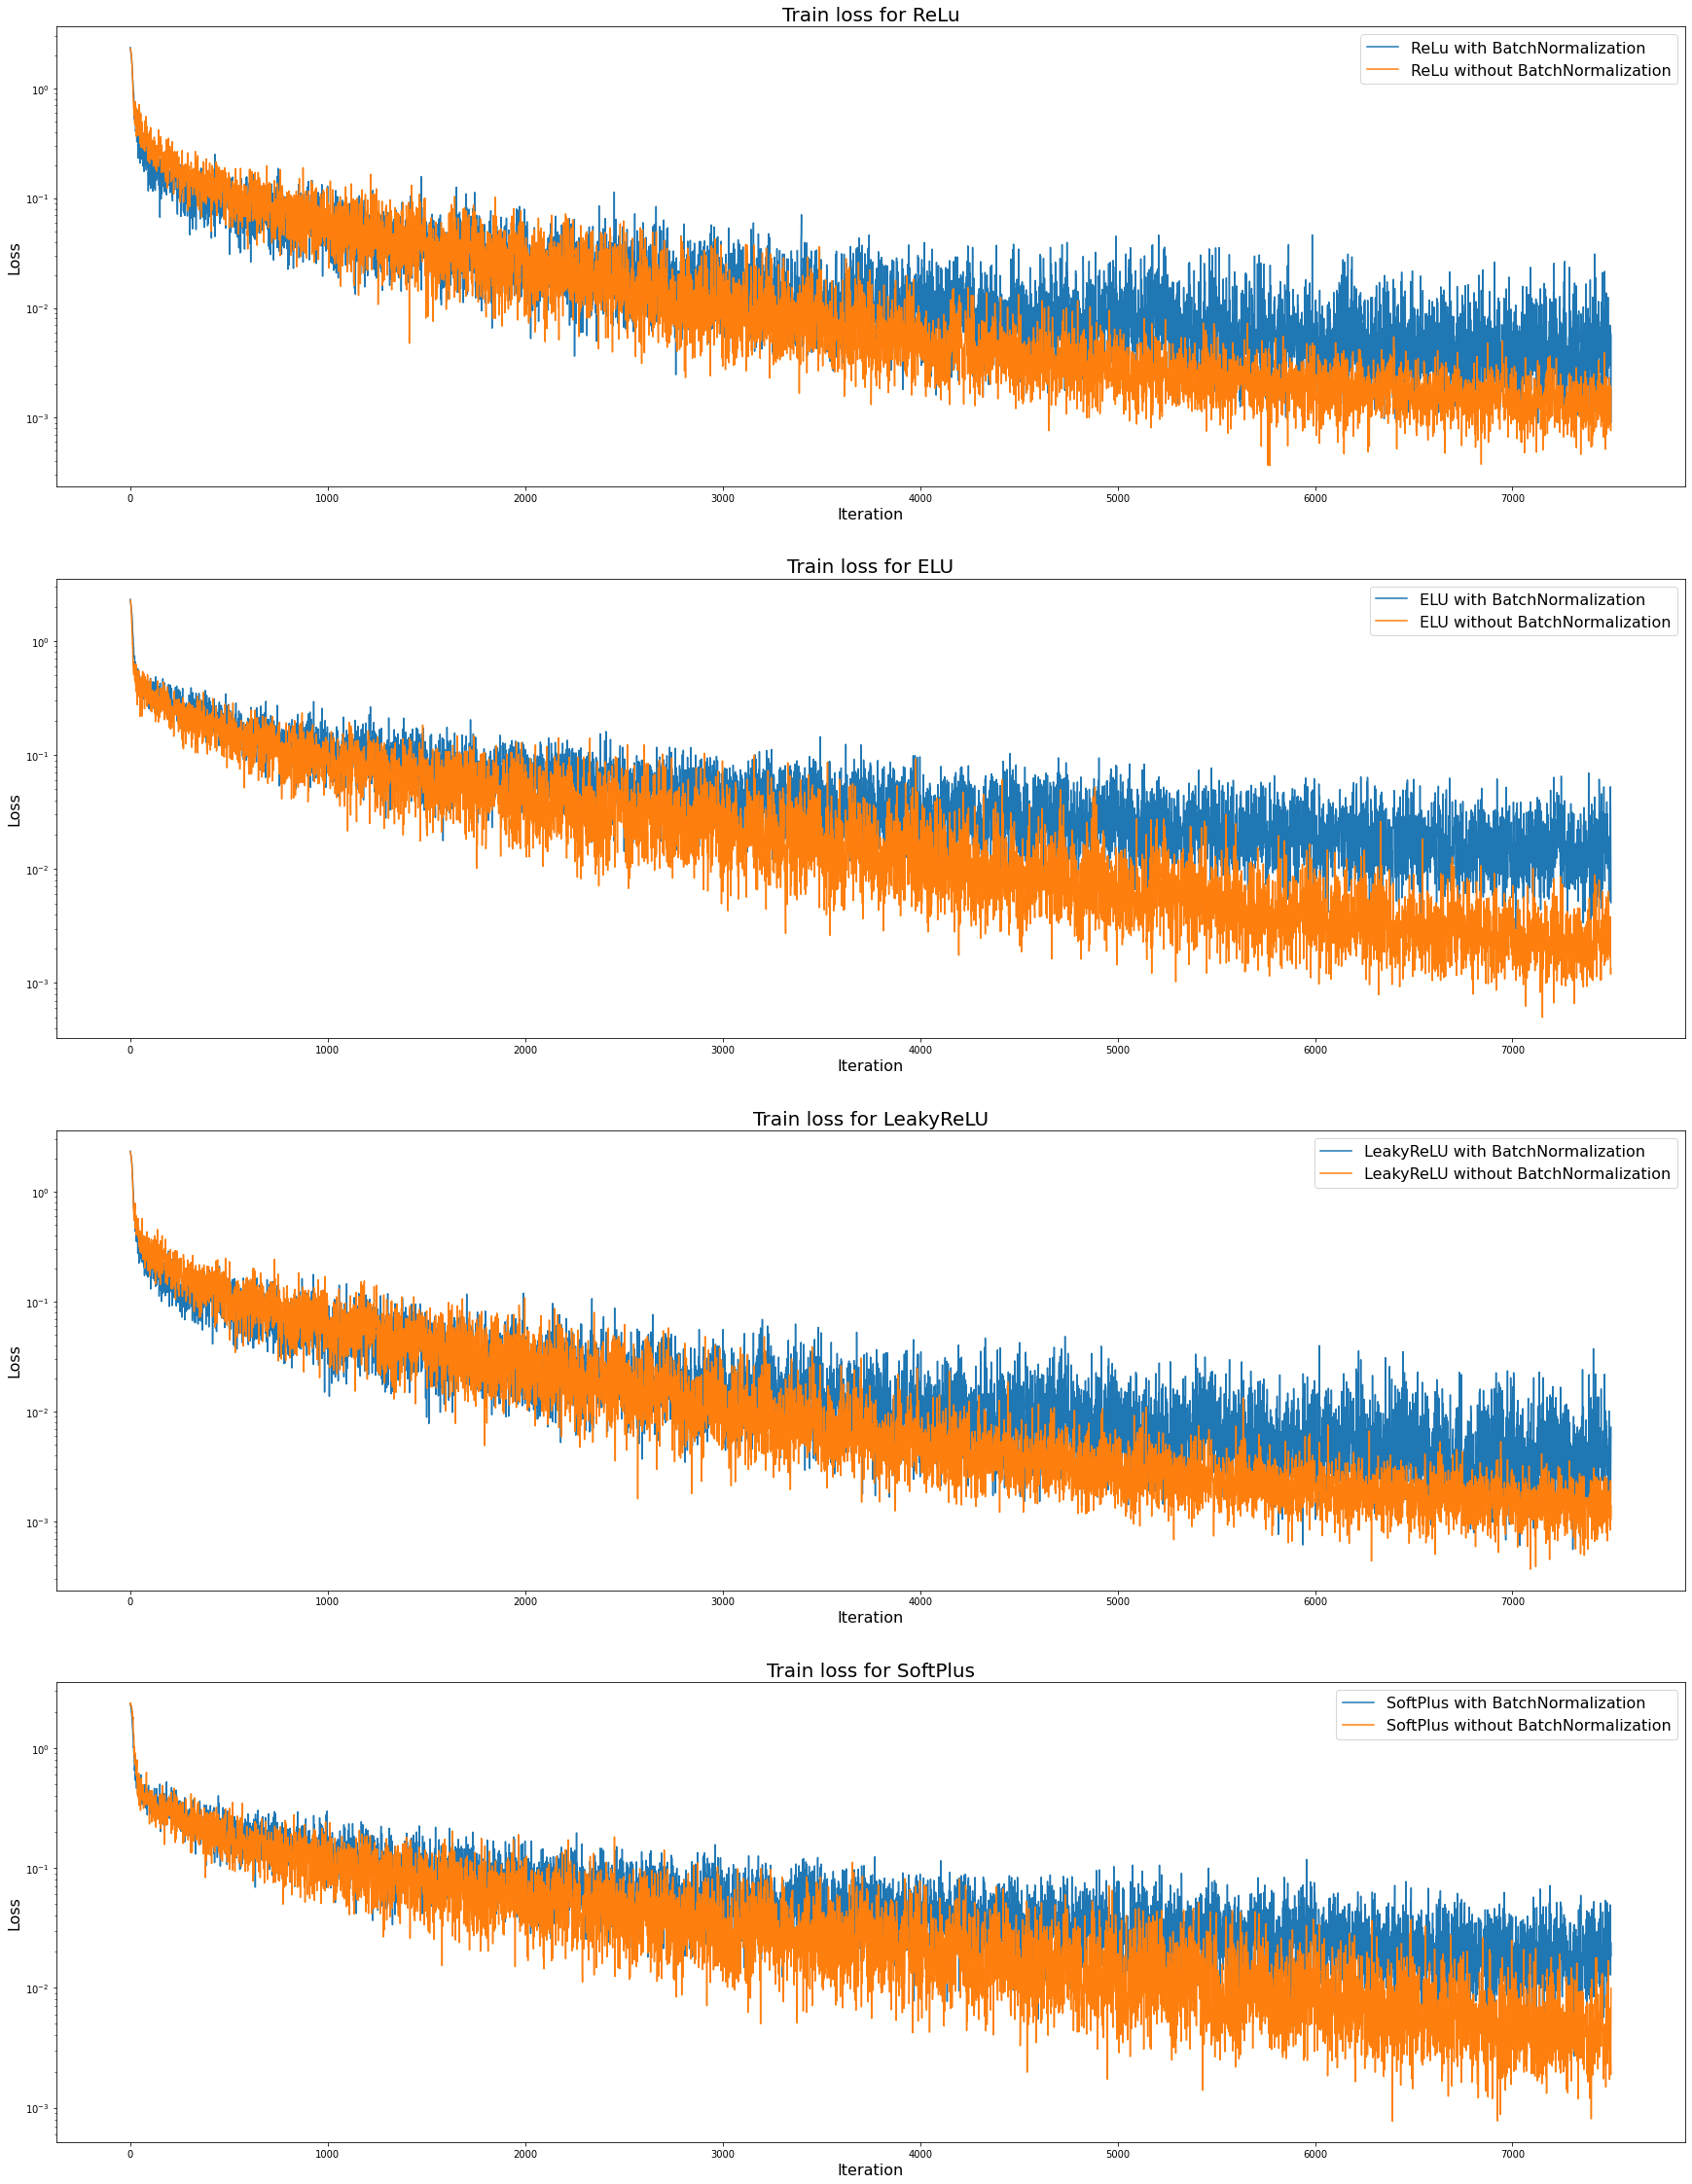

Time for training with ReLu with BatchNormalization: 42.020859241485596
Time for training with ReLu without BatchNormalization: 66.29362845420837
Time for training with ELU with BatchNormalization: 45.740801095962524
Time for training with ELU without BatchNormalization: 69.02833032608032
Time for training with LeakyReLU with BatchNormalization: 43.378201961517334
Time for training with LeakyReLU without BatchNormalization: 70.88073587417603
Time for training with SoftPlus with BatchNormalization: 40.356013774871826
Time for training with SoftPlus without BatchNormalization: 63.36786723136902


In [43]:
fig, axes = plt.subplots(4, 1, figsize=(30, 40))
title_list_old = ['ReLu', 'ELU', 'LeakyReLU', 'SoftPlus']

for old_title, title, ax in zip(title_list_old, title_list_batch, axes):

    ax.semilogy(train_loss[title], label = title)
    ax.semilogy(train_loss_old[old_title], label = old_title + ' without BatchNormalization')
    ax.set_title("Train loss for " + old_title, fontsize = 20)
    ax.set_xlabel("Iteration", fontsize = 16)
    ax.set_ylabel("Loss", fontsize = 16)
    ax.legend(loc = 'best', fontsize = 16)

plt.show()

for old_title, title in zip(title_list_old, title_list_batch):    
    print('Time for training with ' + title + ': ' + str(time_[title]))
    print('Time for training with ' + old_title + ' without BatchNormalization: ' + str(time_old[old_title]))

I expected benefit from the BatchNormalization actually, I don't think that these results are good. Maybe problem is in poor parameter tuning or low number of epochs (but again, then I do not understand yet how to find such parameters). I assume that training time is still low - with sufficient number of epochs net with BatchNormalization should outperform net without it.

- *[1 pts]* Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?  

In [44]:
criterion = ClassNLLCriterion() # criterion
N = 30 # number of epochs
batch_size = 200 # batch
optimizer_config = {'learning_rate': 1e-2, 
                    'beta1':0.9, 
                    'beta2':0.99, 
                    'epsilon': 1e-8}
optimizer_state = {}
activation_list = [ReLU()] # I decided to go with 1 network just to save some time on training
title_list_adam = ['ReLu with Adam optimizer']

time_ = {}

train_loss = {}
test_loss = {}
val_loss = {}

In [45]:
for activation, title in zip(activation_list, title_list_adam):
    net = f_net(activation)
    time_net = 0
    start = 0
    
    loss_history = []
    optimizer_state = {}
    print(title + ' training...')
    
    for epoch in tqdm(range(N)):
        for x_batch, y_batch in get_batches((X_train, y_train_hot), batch_size):
        ######################
            net.zeroGradParameters()
            start = time()
            pred = net.forward(x_batch)
            loss = criterion.forward(pred, y_batch)
            dp = criterion.backward(pred, y_batch)
            net.backward(x_batch, dp)
        
            adam_optimizer(net.getParameters(), 
                        net.getGradParameters(), 
                        optimizer_config,
                        optimizer_state)      
        
            loss_history.append(loss)
            time_net += time() - start
        ######################
        #train_loss_history.append(loss_history)
        '''
            pred_val = net.forward(X_val)
            val_loss_history.append(criterion.forward(pred_val, y_val_hot))
        '''
    time_[title] = time_net
    train_loss[title] = loss_history

ReLu with Adam optimizer training...


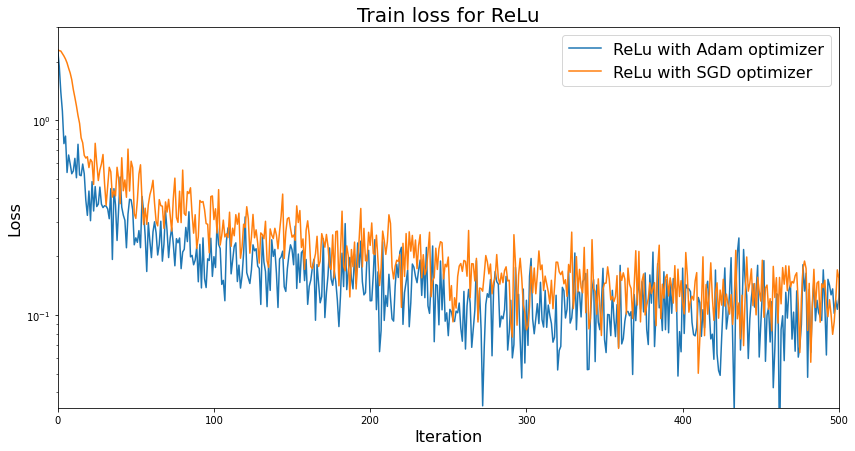

Time for training with ReLu with Adam optimizer with Adam optimizer: 89.33415746688843
Time for training with ReLu with SGD optimizer: 66.29362845420837


In [46]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

plt.semilogy(train_loss[title_list_adam[0]], label = title_list_adam[0])
plt.semilogy(train_loss_old['ReLu'], label = 'ReLu' + ' with SGD optimizer')

#ax.semilogy(train_loss_old[old_title], label = old_title + ' with SGD optimizer')
plt.title("Train loss for " + title_list[0], fontsize = 20)
plt.xlabel("Iteration", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend(loc = 'best', fontsize = 16)

plt.xlim(0, 500) # for better representation I'll cut it a bit
plt.ylim(10**(-2)/0.3, 3)
plt.show()
    
print('Time for training with ' + title_list_adam[0] + ' with Adam optimizer: ' + str(time_[title]))
print('Time for training with ' + title_list[0] + ' with SGD optimizer: ' + str(time_old['ReLu']))


Despite training time with Adam is bigger, this optimizer outperforms SGD in terms of convergence (expected result). So here it is definetely a better choice.

- *[2 pts]* Increase the number of parameters in the network. Try inserting the Dropout layer. Compare the validation performance and the gap between test and validation performances for the two experiments (with and without Dropout). Compare the loss plots. Which one converges slower?

In [47]:
def f_net_dropout(activation, hidden = 300, out = 10, prob = 0.8):
    net = Sequential()
    input = 28*28
    net.add(Linear(input, hidden))
    net.add(Dropout(prob))
    net.add(activation)
    net.add(Linear(hidden,out))
    net.add(LogSoftMax())
    return net 

In [48]:
criterion = ClassNLLCriterion() # criterion
N = 30 # number of epochs
batch_size = 200 # batch


optimizer_config = {'learning_rate' : 1e-1, 
                    'momentum': 0.9}
optimizer_state = {}
activation_list = [ReLU()]
title_list_dropout = ['ReLu with Dropout']

time_ = {}

train_loss = {}
test_loss = {}
val_loss = {}

In [49]:
for activation, title in zip(activation_list, title_list_dropout):
    net = f_net_dropout(activation)
    net_old = f_net(activation)
    time_net = 0
    start = 0
    
    loss_history = []
    val_loss_history = []
    test_loss_history = []
    val_loss_history_old = []
    test_loss_history_old = []
    optimizer_state = {}
    print(title + ' training...')
    
    for epoch in tqdm(range(N)):
        for x_batch, y_batch in get_batches((X_train, y_train_hot), batch_size):
        ######################
            net.zeroGradParameters()
            start = time()
            pred = net.forward(x_batch)
            loss = criterion.forward(pred, y_batch)
            dp = criterion.backward(pred, y_batch)
            net.backward(x_batch, dp)
        
            sgd_momentum(net.getParameters(), 
                        net.getGradParameters(), 
                        optimizer_config,
                        optimizer_state)      
        
            loss_history.append(loss)
            time_net += time() - start      


        pred_val = net.forward(X_val)
        val_loss_history.append(criterion.forward(pred_val, y_val_hot))
        pred_test = net.forward(X_test)
        test_loss_history.append(criterion.forward(pred_test, y_test_hot))

        
        ######################
        #train_loss_history.append(loss_history)
        '''
            pred_val = net.forward(X_val)
            val_loss_history.append(criterion.forward(pred_val, y_val_hot))
        '''
            
    time_[title] = time_net
    train_loss[title] = loss_history
    val_loss[title] = val_loss_history
    test_loss[title] = test_loss_history
    #val_loss_old[title] = val_loss_history_old
    #test_loss_old[title] = test_loss_history_old

ReLu with Dropout training...


Train loss for different activation functions

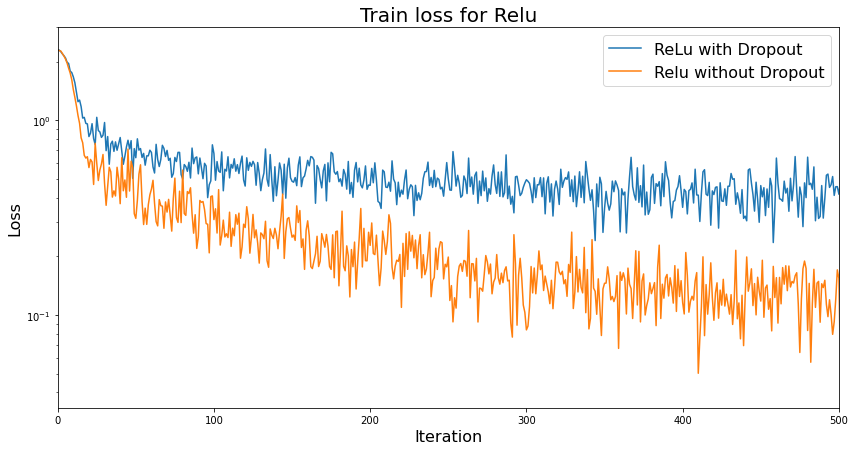

Time for training with ReLu with Dropout: 94.34219551086426
Time for training with Relu without Dropout: 66.29362845420837


In [50]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

plt.semilogy(train_loss[title_list_dropout[0]], label = title_list_dropout[0])
plt.semilogy(train_loss_old['ReLu'], label = 'Relu' + ' without Dropout')
plt.title("Train loss for " + 'Relu', fontsize = 20)
plt.xlabel("Iteration", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend(loc = 'best', fontsize = 16)

plt.xlim(0, 500) # for better representation I'll cut it a bit
plt.ylim(10**(-2)/0.3, 3)
plt.show()
      
print('Time for training with ' + title_list_dropout[0] + ': ' + str(time_[title_list_dropout[0]]))
print('Time for training with ' + 'Relu' + ' without Dropout: ' + str(time_old['ReLu']))

Validation loss for different activation functions

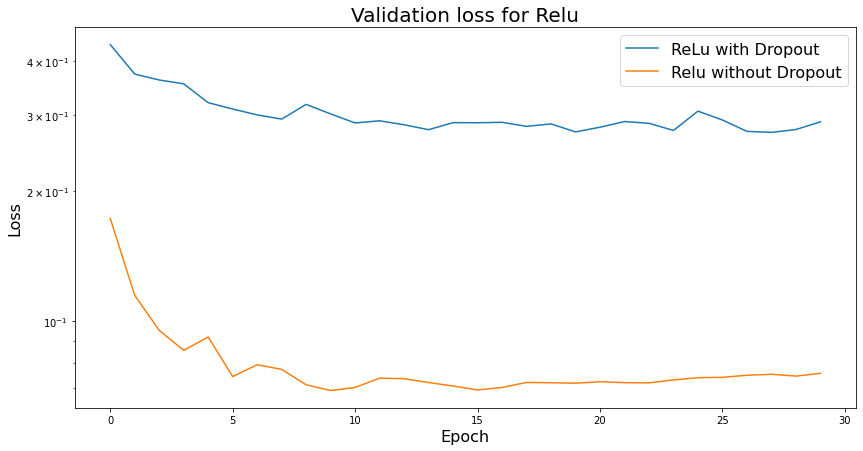

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

plt.semilogy(val_loss[title_list_dropout[0]], label = title_list_dropout[0])
plt.semilogy(val_loss_old[title_list[0]], label = 'Relu' + ' without Dropout')
plt.title("Validation loss for " + 'Relu', fontsize = 20)
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend(loc = 'best', fontsize = 16)

plt.show()

Gap between test and validation perfomances

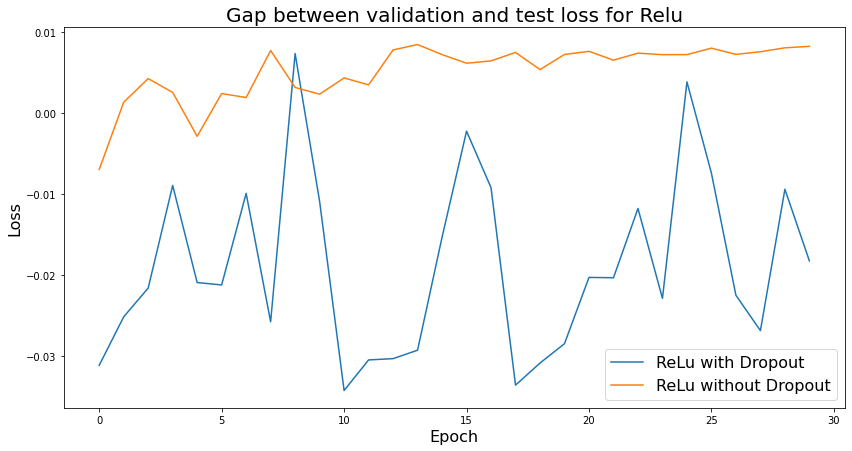

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))
dif1 = np.array(val_loss[title_list_dropout[0]]) - np.array(test_loss[title_list_dropout[0]]) 
dif2 = np.array(val_loss_old[title_list[0]]) - np.array(test_loss_old[title_list[0]])
plt.plot(dif1, label = title_list_dropout[0])
plt.plot(dif2, label = title_list[0] + ' without Dropout')
plt.title("Gap between validation and test loss for " + 'Relu', fontsize = 20)
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.legend(loc = 'best', fontsize = 16)

plt.show()

Dropout - possible solution to overfitting problem. The perfomance of net with Dropout is not better than without Dropout in terms of convergence. Possible reasons may include simple structure of net itself and perhaps wrong dropout threshold (I tune it from 0.5 to 0.9 but results were not better than in this case). As for gap, for second case (without Dropout) is actually higher than with it (in terms of absolute value), that means that Dropout decreased the difference between test and validation results as it was suppose to do.


# Part 4: Convolutional neural networks

In the previous part you needed to train a dense, or fully-connected, neural network. This part of the homework is to prepare modules for training a basic convolutional network: `Conv2D`, `Flatten`, `MaxPool2d`. 

Your task is to implement a simple framework for convolutional neural networks training. While convolutional neural networks is a subject of lecture 3, we expect that there are a lot of students who are familiar with the topic.

In order to successfully complete this part, you will have to:

- Implement all the layers below (`Conv2d`, `MaxPool2d`; `Flatten` is already implemented for convenience). Good implementation should pass all the tests in the subsequent cells.
- Train a CNN that has at least one `Conv2d` layer and at least one `MaxPool2d` layer and achieves at least 97% accuracy on MNIST test set.

Feel free to use the code from Part 3 for debugging or as a source of code snippets. 

# Layers for Part 4

## 12. Conv2d *[2 pts]*
- input:   **`batch_size x in_channels x h x w`**
- output: **`batch_size x out_channels x h x w`**

You should implement a layer which works like PyTorch `Conv2d` layer with `stride=1` and zero-padding outside of image using `scipy.signal.correlate` function.

Practical notes:
- While the layer name is "convolution", most of neural network frameworks (including TensorFlow and PyTorch) implement operation that is called [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation#Cross-correlation_of_deterministic_signals) in signal processing theory. So **don't use** `scipy.signal.convolve` since it implements [convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution) in terms of signal processing.
- It may be convenient to use `np.pad` or `skimage.util.pad` for zero-padding.
- It's rather ok to implement convolution over 4d array using 2 nested loops: one over batch size dimension and another one over output filters dimension
- Having troubles with understanding how to implement the layer? 
 - Check out e.g. this link on how to make forward pass and to calculate all the gradients: https://towardsdatascience.com/backpropagation-in-a-convolutional-layer-24c8d64d8509
 - May the google be with you

In [13]:
import scipy as sp
import scipy.signal
import skimage

class Conv2d(Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super(Conv2d, self).__init__()
        assert kernel_size % 2 == 1, kernel_size
       
        stdv = 1./np.sqrt(in_channels)
        self.W = np.random.uniform(-stdv, stdv, size = (out_channels, in_channels, kernel_size, kernel_size))
        self.b = np.random.uniform(-stdv, stdv, size=(out_channels,))
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        pad_size = self.kernel_size // 2
        # YOUR CODE ##############################
        # 1. zero-pad the input array
        # 2. compute convolution using scipy.signal.correlate(... , mode='valid')
        # 3. add bias value
        
        d = (0, )

        self.output = np.zeros((input.shape[0], # output internal shapes
                                self.out_channels, # as in paper
                                int(pad_size * 2 - self.kernel_size + input.shape[2] + 1), # from common sence we know the dimensions
                                int(pad_size * 2 - self.kernel_size + input.shape[3] + 1)))

        input = np.pad(input, # paddding an input variable
                       (d, 
                        d, 
                        (pad_size, ), 
                        (pad_size, )), 
                       'constant')
        
        for n in range(input.shape[0]):
            for m in range(self.out_channels):
                for k in range(self.in_channels):
                    Corr = scipy.signal.correlate(input[n, k, :, :], 
                                                  self.W[m, k, :, :], 
                                                  mode='valid') # convolution 
                    self.output[n, m, :, :] = self.output[n, m, :, :] + Corr 

                self.output[n, m, :, :] = np.add(self.output[n, m, :, :], self.b[m]) # bias
                    
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        pad_size = self.kernel_size // 2
        # YOUR CODE ##############################
        # 1. zero-pad the gradOutput
        # 2. compute 'self.gradInput' value using scipy.signal.correlate(... , mode='valid')
        
        d = (0, ) # dummy to add zeros
        self.gradInput = np.zeros_like(input)
        weights = np.zeros_like(self.W)
        G = np.pad(self.gradInput, 
                               (d, # add zeros
                                d, # add zeros
                                (pad_size, ), 
                                (pad_size, )), 
                               'constant')

        '''
        gradOutput = np.pad(gradOutput, 
                            (d, 
                             d, 
                             (self.kernel_size, ), 
                             (self.kernel_size, )), 
                            'constant')
        '''

        gradOutput = np.pad(gradOutput, # zero-padding the input
                            (d, # add zeros
                             d, # add zeros
                             (self.kernel_size - 1, ), 
                             (self.kernel_size - 1, )), 
                            'constant') # we pad with constant value
        
        for ker_i in range(self.kernel_size): # update weights
            for ker_j in range(self.kernel_size): # also as in paper
                #weights[:, :, ker_i, ker_j] = self.W[:, :, self.kernel_size - ker_i, self.kernel_size - ker_j]
                weights[:, :, ker_i, ker_j] = self.W[:, :, self.kernel_size - ker_i - 1, self.kernel_size - ker_j - 1]
            
        for i in range(input.shape[0]):
            for in_ in range(self.in_channels):
                for out_ in range(self.out_channels): # convolution
                    Corr = scipy.signal.correlate(gradOutput[i, out_, :, :], 
                                                  weights[out_, in_, :, :], 
                                                  mode = 'valid')
                    G[i, in_, :, :] = G[i, in_, :, :] +  Corr 
                    
        self.gradInput = G[:, :, pad_size : -pad_size, pad_size : -pad_size] # back to normal size
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        pad_size = self.kernel_size // 2
        # YOUR CODE #############
        # 1. zero-pad the input
        # 2. compute 'self.gradW' using scipy.signal.correlate(... , mode='valid')
        # 3. compute 'self.gradb' - formulas like in Linear of ChannelwiseScaling layers 
        d = (0, )
        input = np.pad(input, # zero-padding the input
                        (d, 
                         d, 
                         (pad_size,),
                         (pad_size,)), 
                         'constant') # we pad with constant value
        
        for i in range(input.shape[0]):
            for in_ in range(self.in_channels):
                for out_ in range(self.out_channels):
                    Corr = scipy.signal.correlate(input[i, in_, :, :], 
                                                  gradOutput[i, out_, :, :], 
                                                  mode='valid')
                    self.gradW[out_, in_, :, :] = self.gradW[out_, in_, :, :] + Corr
        self.gradb = np.sum(gradOutput, 
                            axis=(0, 2, 3))
    
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Conv2d %d -> %d' %(s[1],s[0])
        return q

## 13. MaxPool2d *[2 pts]*
- input:   **`batch_size x n_input_channels x h x w`**
- output: **`batch_size x n_output_channels x h // kern_size x w // kern_size`**

You are to implement simplified version of pytorch `MaxPool2d` layer with stride = kernel_size. Please note, that it's not a common case that stride = kernel_size: in AlexNet and ResNet kernel_size for max-pooling was set to 3, while stride was set to 2. We introduce this restriction to make implementation simplier.

Practical notes:
- During forward pass what you need to do is just to reshape the input tensor to `[n, c, h / kern_size, kern_size, w / kern_size, kern_size]`, swap two axes and take maximums over the last two dimensions. Reshape + axes swap is sometimes called space-to-batch transform.
- During backward pass you need to place the gradients in positions of maximal values taken during the forward pass
- In real frameworks the indices of maximums are stored in memory during the forward pass. It is cheaper than to keep the layer input in memory and recompute the maximums. 

**Hint:** `np.put_along_axis` might be useful during backward pass.

In [14]:
class MaxPool2d(Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        self.kernel_size = kernel_size
        self.gradInput = None

    def updateOutput(self, input):
        input_h, input_w = input.shape[-2:]
        # your may remove these asserts and implement MaxPool2d with padding
        assert input_h % self.kernel_size == 0  
        assert input_w % self.kernel_size == 0
    
        # YOUR CODE #############################

        self.ind_list = [] # storing indices in memory


        input_reshaped = input[:,:,:input_h, :input_w].reshape(input.shape[0],
                                                               input.shape[1],
                                                               input_h // self.kernel_size, 
                                                               self.kernel_size, 
                                                               input_w // self.kernel_size, 
                                                               self.kernel_size)
        self.output = np.max(input_reshaped, axis=(3, 5))
        
        for i in range(input.shape[0]):
            for j in range(input.shape[1]):
                for h in range(input_h // self.kernel_size):
                    for w in range(input_w // self.kernel_size):
                        #ind_placement = np.argmax(np.where(input[i, j, self.kernel_size * h : self.kernel_size * (h + 1), self.kernel_size * w : self.kernel_size * (w + 1)] == self.output[i, j, h, w]))
                        #ind_placement = (where(input[i, j, self.kernel_size * h : self.kernel_size * (h + 1), self.kernel_size * w : self.kernel_size * (w + 1)] == self.output[i, j, h, w])).index(max((where(input[i, j, self.kernel_size * h : self.kernel_size * (h + 1), self.kernel_size * w : self.kernel_size * (w + 1)] == self.output[i, j, h, w]))))
                        ind_placement = np.array(np.where(input[i, j, self.kernel_size * h : self.kernel_size * (h + 1), self.kernel_size * w : self.kernel_size * (w + 1)] == self.output[i, j, h, w]))
                        indices_array = [i, j] + [self.kernel_size *
                                                  h + ind_placement.squeeze()[0]] + [self.kernel_size * w + ind_placement.squeeze()[1]]
                        indices_array = np.array(indices_array)
                        self.ind_list.append(indices_array)
                        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        
        # YOUR CODE #############################

        #self.gradInput = np.zeros(input.shape[0])
        self.gradInput = np.zeros_like(input)
        
        flag = 0

        for i in np.array(self.ind_list) :
            self.gradInput[i[0], 
                           i[1], 
                           i[2], 
                           i[3]] = gradOutput.flatten()[flag]
            flag = flag + 1
        return self.gradInput
    
    def __repr__(self):
        q = 'MaxPool2d, kern %d, stride %d' %(self.kernel_size, self.kernel_size)
        return q

### Flatten layer
Just reshapes inputs and gradients. It's usually used as proxy layer between Conv2d and Linear.

The layer is already implemented below, you don't need to change it.

In [15]:
class Flatten(Module):
    def __init__(self):
        super(Flatten, self).__init__()
    
    def updateOutput(self, input):
        self.output = input.reshape(len(input), -1)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput.reshape(input.shape)
        return self.gradInput
    
    def __repr__(self):
        return "Flatten"

# Testing your layers

Please run the following cells to check if the implementations are correct (all tests are passed):

In [16]:
from test_modules import make_advanced_tester
import unittest

In [17]:
TestLayersAdv = make_advanced_tester({
    'Conv2d': Conv2d,
    'Flatten': Flatten,
    'MaxPool2d': MaxPool2d,
})

In [18]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLayersAdv)

In [19]:
unittest.TextTestRunner(verbosity=2).run(suite)

test_Conv2d (test_modules.make_advanced_tester.<locals>._tester) ... ok
test_MaxPool2d (test_modules.make_advanced_tester.<locals>._tester) ... ok

----------------------------------------------------------------------
Ran 2 tests in 1.074s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

# Training a convolutional network  *[3 pts]*

Here you task is to train a CNN that has at least one `Conv2d` layer and `MaxPool2d` layer which achieves at least 97% accuracy on MNIST **test** set.

**Hint:** Layers implemented in this homework run on CPU, and if the network is too deep, training might last forever, so we suggest to start with smaller networks. This subtask can be solved with a ConvNet having only 3 `Conv2d` layers (or even less) with a small number of channels.

In [104]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [105]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()  # your dataset

In [106]:
from sklearn.preprocessing import OneHotEncoder

ohot_encoder = OneHotEncoder(categories=[range(10)])

y_train_hot = np.asarray(ohot_encoder.fit_transform(y_train.reshape(-1, 1)).todense())
y_val_hot = np.asarray(ohot_encoder.transform(y_val.reshape(-1, 1)).todense())
y_test_hot = np.asarray(ohot_encoder.transform(y_test.reshape(-1, 1)).todense())

In [143]:
# architecure was inspired by:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/convolutional_neural_network/main.py

# out = 10 - number of classes
def f_net_conv(in_ch = 1, hidden = 10, ker = 3, out = 10):
    input_hidden = 7 * 7 * 20
    net = Sequential()
    # 1 layer
    net.add(Conv2d(in_channels = in_ch, out_channels = hidden, kernel_size = ker))
    net.add(LeakyReLU())
    net.add(MaxPool2d(kernel_size = 2))
    # 2 layer
    net.add(Conv2d(in_channels = hidden, out_channels=5, kernel_size = ker))
    net.add(LeakyReLU())
    net.add(Flatten())
    # out
    net.add(Linear(n_in = input_hidden, n_out = out))
    
    net.add(LogSoftMax())
    return net 

def accuracy_conv(logits, y_true):
    y_pred = np.argmax(logits, axis=-1)
    acc = (np.array(y_pred) == np.array(y_true)).mean()
    return acc

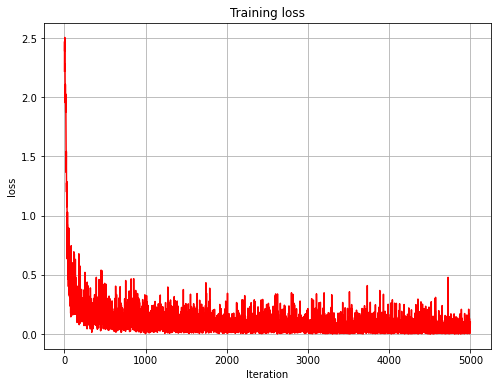

Accuracy on test:  [False False False ... False False False]
Current loss: 0.100716


In [150]:
net = f_net_conv()

n_epochs = 5 # should converge well even within 5 epochs
batch_size = 50 # even 128 is too much, so I took < 128 // 2
lr = 1e-2

acc_test_list = []
loss_history = []
loss_list = []    
criterion = ClassNLLCriterion() # out is LogSoftMax

# copy+paste of your train code + part 3 code basically, nothing new :)

# Optimizers params
optimizer_config = {'learning_rate' : lr, 'momentum': 0.9}
optimizer_state = {}
    
for epoch in range(n_epochs):
    for x_batch, y_batch in tqdm(get_batches((X_train, y_train_hot), batch_size)):

        
        net.zeroGradParameters()

        # Forward
        pred = net.forward(x_batch[:, np.newaxis, :, :]) # slice and dice
        loss = criterion.forward(pred, y_batch)

        # Backward
        dp = criterion.backward(pred, y_batch)
        net.backward(x_batch[:, np.newaxis, :, :], dp) # slice and dice

        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      

        loss_history.append(loss)
    
    pred_test = net.forward(X_test[:, np.newaxis, :, :])  # slice and dice
    ac = accuracy_conv(pred_test, y_test)
    acc_test_list.append(ac) # accumulate accuracy
    loss_list.append(loss_history[-1])

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    
    plt.title("Training loss")
    plt.xlabel("Iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'r')
    plt.grid('on')
    plt.show()
    print("Accuracy on test: " , ac)
    print('Current loss: %f' % loss) 

In [164]:
y_pred_test = net.forward(X_test[:, np.newaxis, :, :])
accuracy =(np.argmax(y_pred_test, axis = -1) == np.array(y_test)).mean()
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9793


### Reward

Once done with the homework, check out [this link](https://www.cs.ryerson.ca/~aharley/vis/conv/) with some beautiful 3D visualization of what convnets really learn on MNIST :)

You can also see [here](https://www.cs.ryerson.ca/~aharley/vis/fc/) that fully-connected networks are not so interpretable. 